In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score

In [3]:
train_path = r'E:\Intern\Flower kath golap\train'
test_path = r'E:\Intern\Flower kath golap\test'
val_path = r'E:\Intern\Flower kath golap\valid'

Bloom


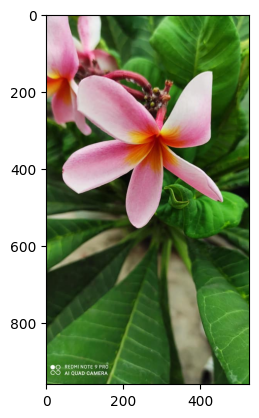

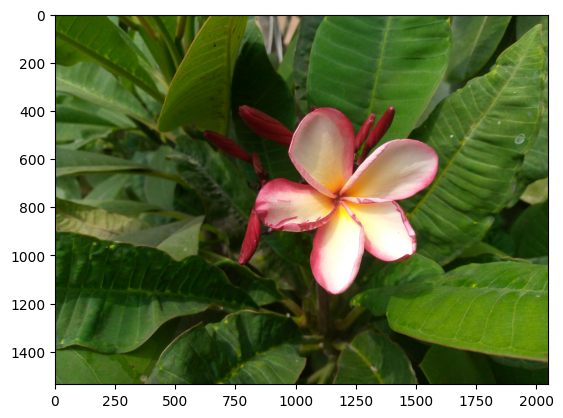

Post Bloom


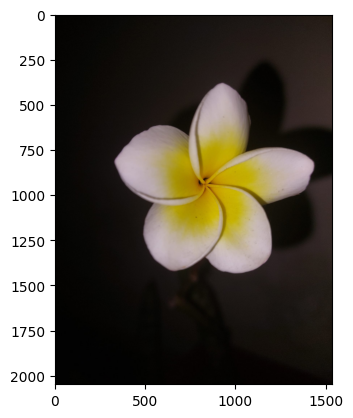

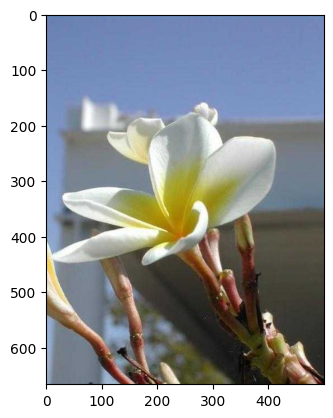

Pre Bloom


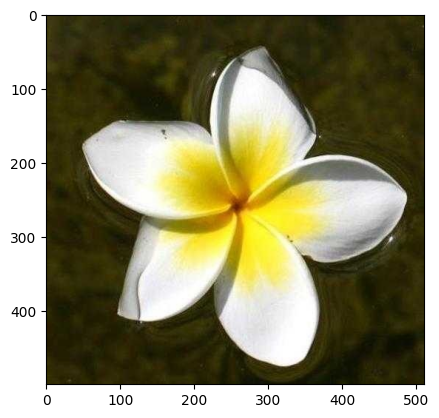

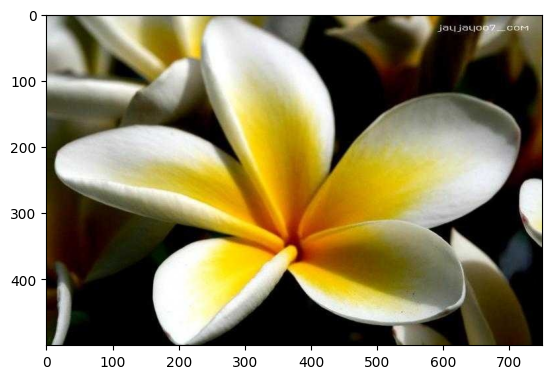

In [4]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [5]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [6]:
size = (250,250)

In [7]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [8]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [10]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [11]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 30 images belonging to 3 classes.
Found 31 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [12]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [13]:
train_class.class_indices

{'Bloom': 0, 'Post Bloom': 1, 'Pre Bloom': 2}

In [14]:
a = train_class.class_indices

In [15]:
y_train.shape,y_test.shape,y_val.shape

((30,), (31,), (30,))

In [24]:
#x2
"""model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (250,250,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(25, activation = 'softmax'))"""

"""model3 = Sequential()
model3.add(Conv2D(filters=64,padding='same',kernel_size=(3,3),activation='relu',input_shape=(250,250,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(5,activation='softmax'))"""
"""
# (3) Create a sequential model
model3 = Sequential()

# 1st Convolutional Layer
model3.add(Conv2D(filters=96, input_shape=(250,250,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model3.add(Activation('relu'))
# Pooling 
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model3.add(BatchNormalization())

# 2nd Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model3.add(BatchNormalization())

# 3rd Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Batch Normalisation
model3.add(BatchNormalization())

# 4th Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Batch Normalisation
model3.add(BatchNormalization())

# 5th Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model3.add(BatchNormalization())

# Passing it to a dense layer
model3.add(Flatten())
# 1st Dense Layer
model3.add(Dense(4096, input_shape=(224*224*3,)))
model3.add(Activation('relu'))
# Add Dropout to prevent overfitting
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# 2nd Dense Layer
model3.add(Dense(4096))
model3.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# 3rd Dense Layer
model3.add(Dense(1000))
model3.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# Output Layer
model3.add(Dense(17))
model3.add(Activation('softmax'))

model3.summary()"""

# # modelling starts using a CNN.


# Initialising the CNN classifier
model3 = Sequential()

# Add a Convolution layer with 32 kernels of 5X5 shape with activation function ReLU
model3.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (250,250,3)))

# Add a Max Pooling layer of size 2X2
model3.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

# Add another Convolution layer with 96 kernels of 3X3 shape with activation function ReLU
model3.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flattening the layer before fully connected layers
model3.add(Flatten())

# Adding a fully connected layer with 512 neurons
model3.add(Dense(512,activation='relu'))

# The final output layer with 5 neuron to predict the categorical classifcation
model3.add(Dense(4, activation = "softmax"))
model3.summary()

ResourceExhaustedError: OOM when allocating tensor with shape[86400,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:Mul]

In [19]:
cnn=model3

In [20]:
for layer in cnn.layers:
    layer.trainable = False

x = Flatten()(cnn.output)
prediction = Dense(3, activation='softmax')(x)

model3 = Model(inputs=cnn.input, outputs=prediction)
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 150, 150, 3)]    0         
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 36, 36, 96)        55392 

In [21]:
#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
#model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
#model3.summary()
model3.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [23]:
#Training the CNN model1
#history = model3.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
#history3 = model3.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

history3 = model3.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50,batch_size = 5,shuffle=True)

Epoch 1/50


ValueError: in user code:

    File "E:\SOFTWARE\anaconda\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "E:\SOFTWARE\anaconda\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\SOFTWARE\anaconda\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "E:\SOFTWARE\anaconda\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "E:\SOFTWARE\anaconda\anaconda3\envs\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\SOFTWARE\anaconda\anaconda3\envs\tensor\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(5, 250, 250, 3)


In [21]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

In [22]:
#x
vgg2 = VGG16(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False) 

In [23]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

model1 = Model(inputs=vgg.input, outputs=prediction)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0   

In [24]:
#x
for layer in vgg2.layers:
    layer.trainable = False

x = Flatten()(vgg2.output)
prediction = Dense(3, activation='softmax')(x)

model2 = Model(inputs=vgg2.input, outputs=prediction)
model2.summary()



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0   

In [25]:
model1.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

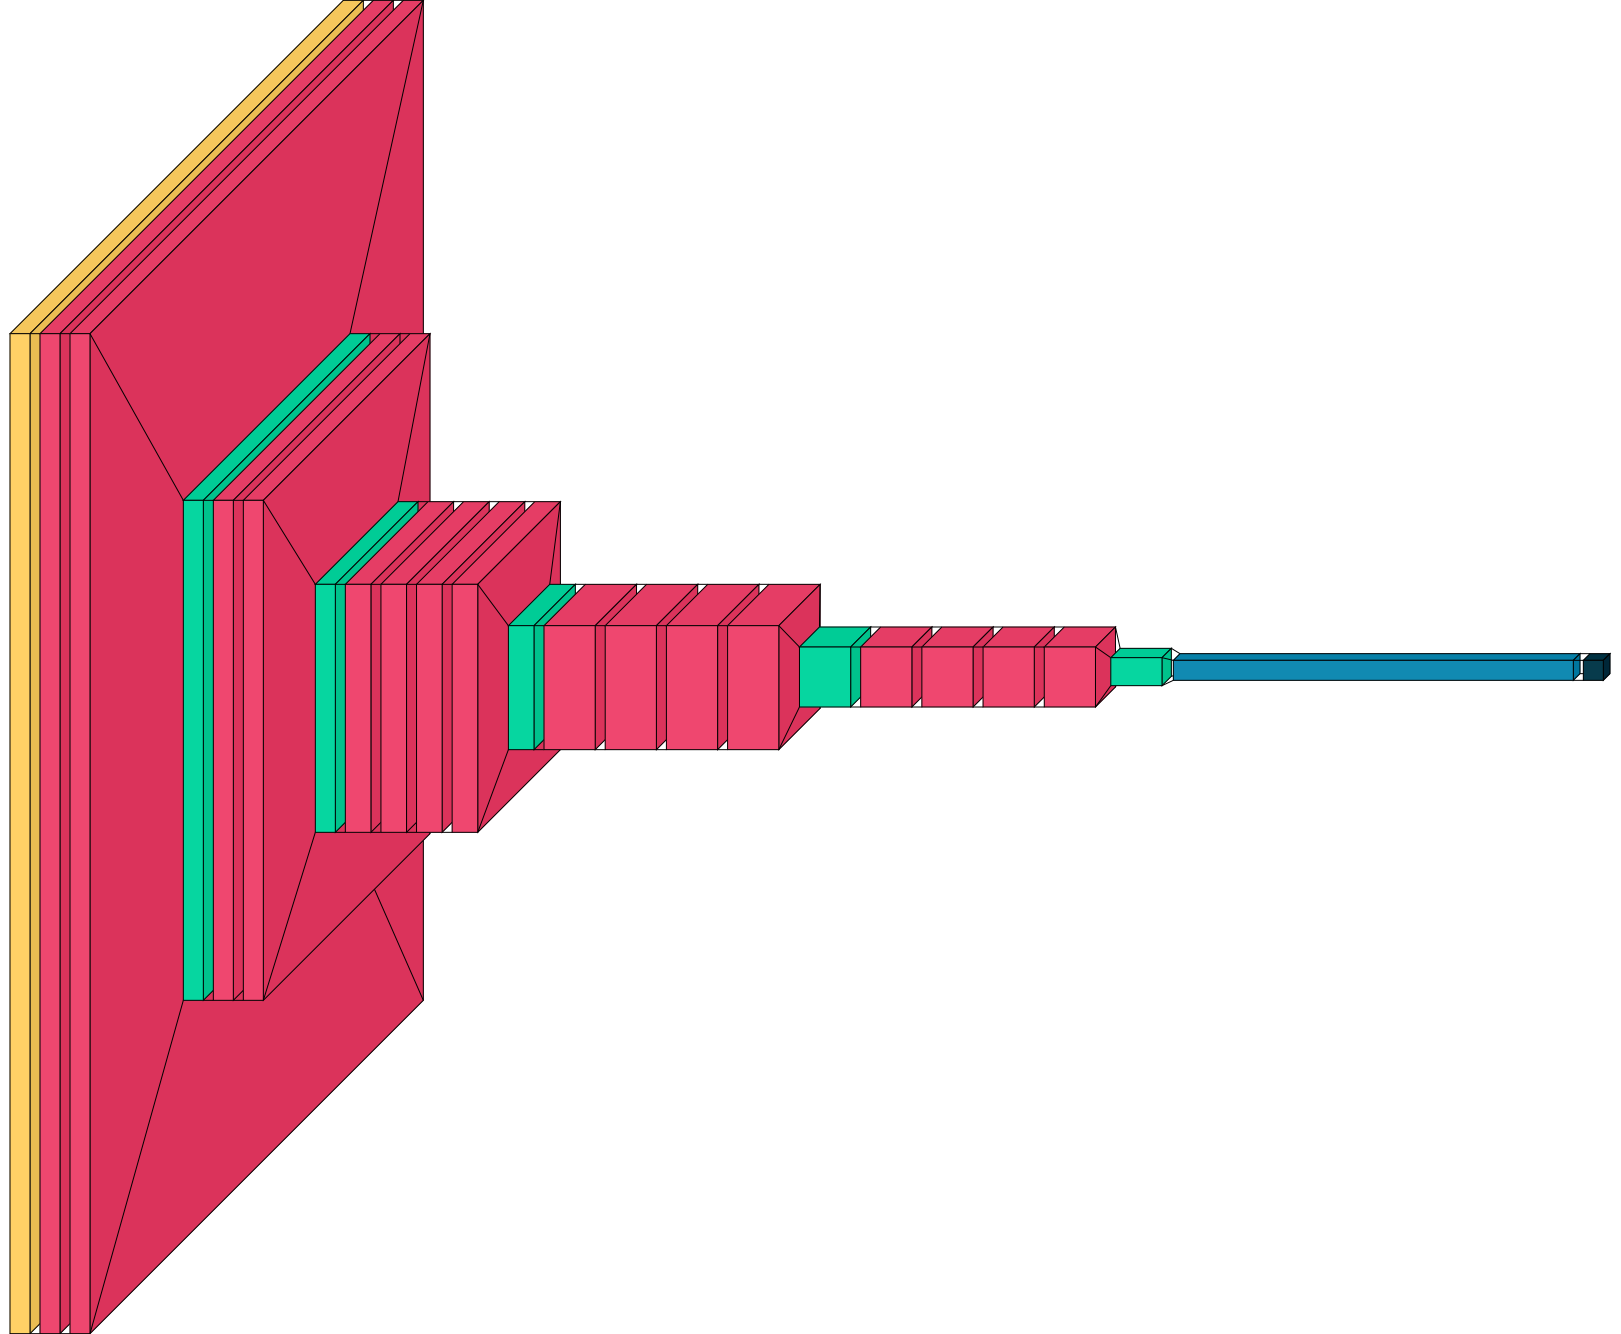

In [26]:
visualkeras.layered_view(model1)

In [27]:
#x
model2.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

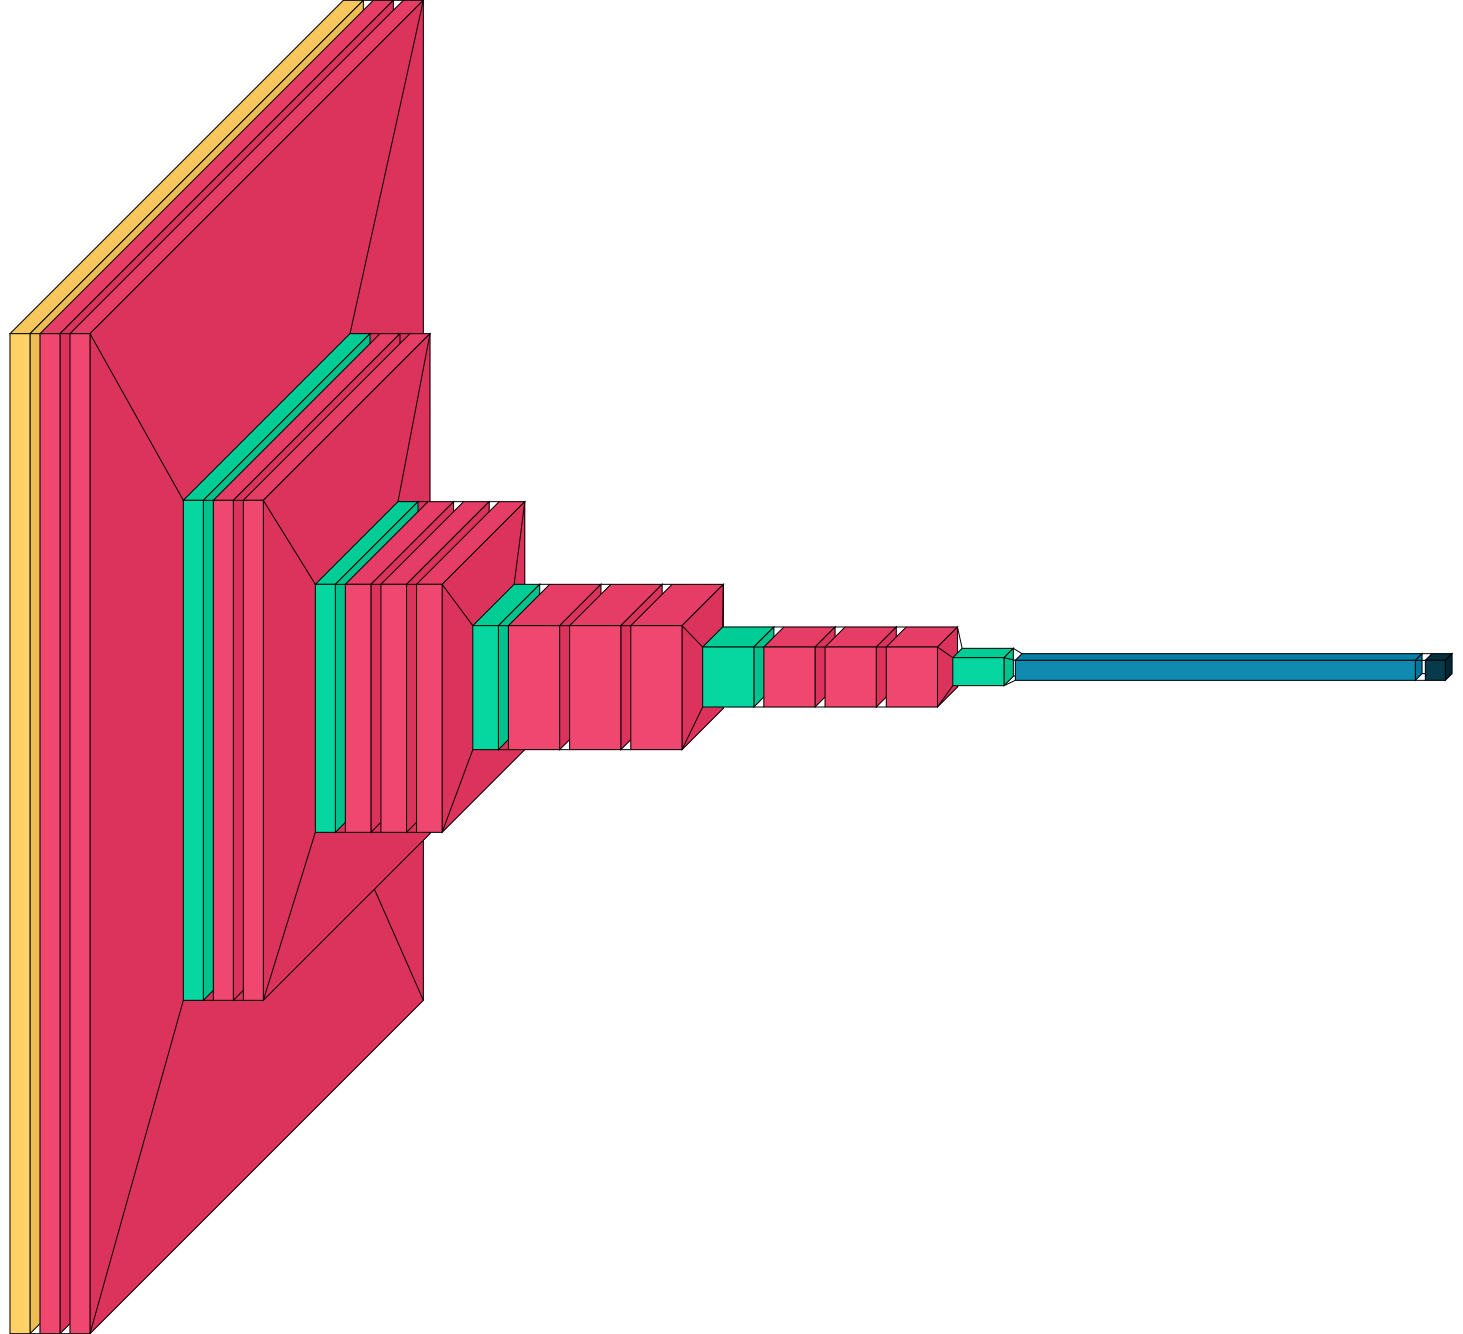

In [28]:
visualkeras.layered_view(model2)

In [29]:
# Fit

#history3 = model3.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10,batch_size = 30,shuffle=True)

history1 = model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 5,batch_size = 30,shuffle=True)

Epoch 1/5
39/39 [==============================] - 16s 261ms/step - loss: 1.3490 - accuracy: 0.4462 - val_loss: 1.0570 - val_accuracy: 0.5143
Epoch 2/5
39/39 [==============================] - 10s 252ms/step - loss: 0.6750 - accuracy: 0.7128 - val_loss: 1.1423 - val_accuracy: 0.5000
Epoch 3/5
39/39 [==============================] - 10s 250ms/step - loss: 0.5240 - accuracy: 0.8111 - val_loss: 1.2667 - val_accuracy: 0.4905
Epoch 4/5
39/39 [==============================] - 10s 253ms/step - loss: 0.4314 - accuracy: 0.8470 - val_loss: 1.0904 - val_accuracy: 0.5095
Epoch 5/5
39/39 [==============================] - 10s 253ms/step - loss: 0.3258 - accuracy: 0.9043 - val_loss: 1.1334 - val_accuracy: 0.5000


In [31]:
#x
# Fit
#history1 = model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10,batch_size = 30,shuffle=True)
history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 5,batch_size = 30,shuffle=True)

Epoch 1/5
39/39 [==============================] - 8s 218ms/step - loss: 1.2476 - accuracy: 0.4675 - val_loss: 1.0983 - val_accuracy: 0.5429
Epoch 2/5
39/39 [==============================] - 8s 207ms/step - loss: 0.6442 - accuracy: 0.7214 - val_loss: 1.0687 - val_accuracy: 0.5286
Epoch 3/5
39/39 [==============================] - 8s 210ms/step - loss: 0.4231 - accuracy: 0.8547 - val_loss: 1.1774 - val_accuracy: 0.5476
Epoch 4/5
39/39 [==============================] - 8s 208ms/step - loss: 0.3533 - accuracy: 0.8923 - val_loss: 1.3689 - val_accuracy: 0.4905
Epoch 5/5
39/39 [==============================] - 8s 207ms/step - loss: 0.3045 - accuracy: 0.9051 - val_loss: 1.1903 - val_accuracy: 0.5333


In [32]:
#x
model1.save(r'D:\university\Thesis\final\Flower kath golap\saved model\model1.hdf5')

In [33]:
#x
model2.save(r'D:\university\Thesis\final\Flower kath golap\saved model\model2.hdf5')

In [34]:
#x
model3.save(r'D:\university\Thesis\final\Flower kath golap\saved model\model3.hdf5')

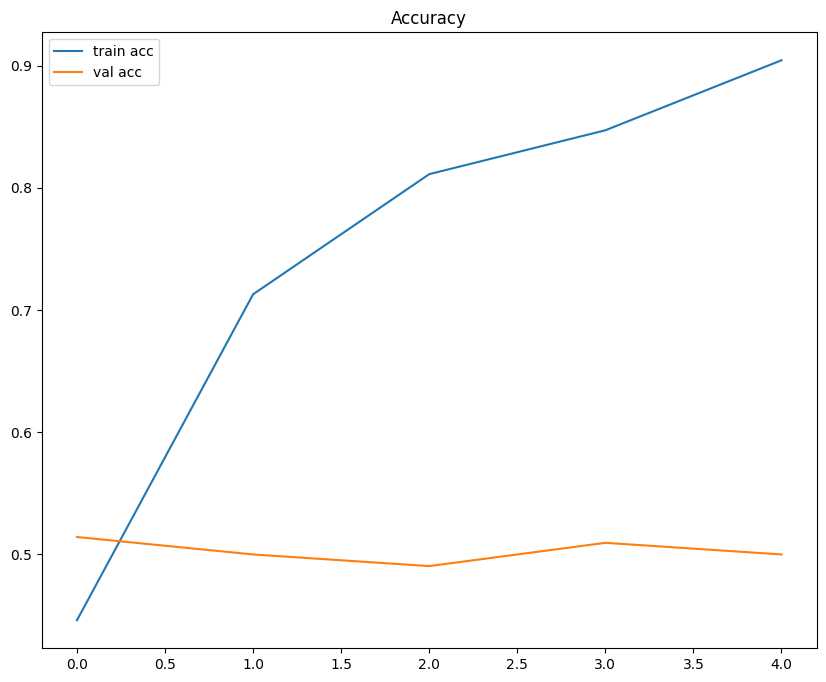

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

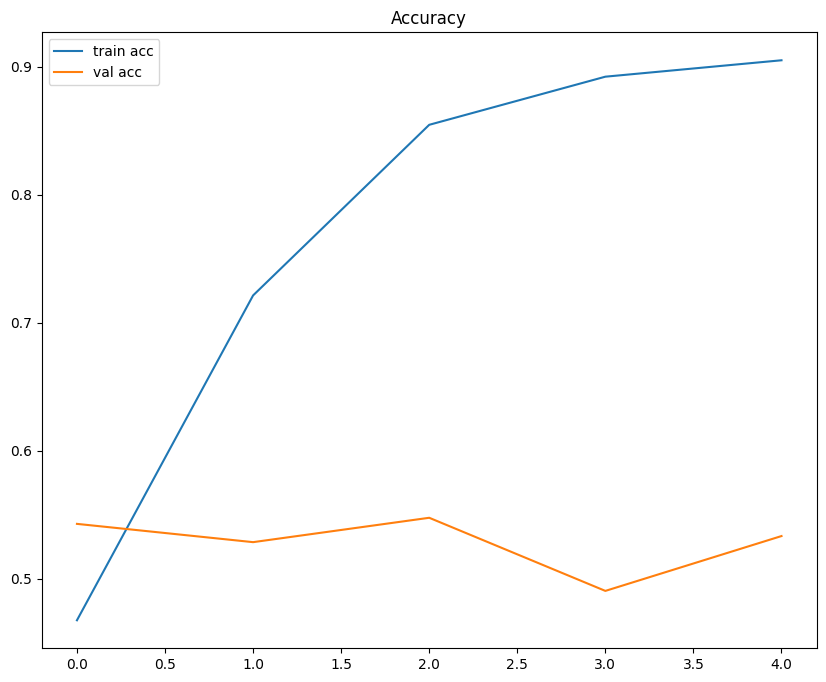

In [36]:
#X
plt.figure(figsize=(10, 8))
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

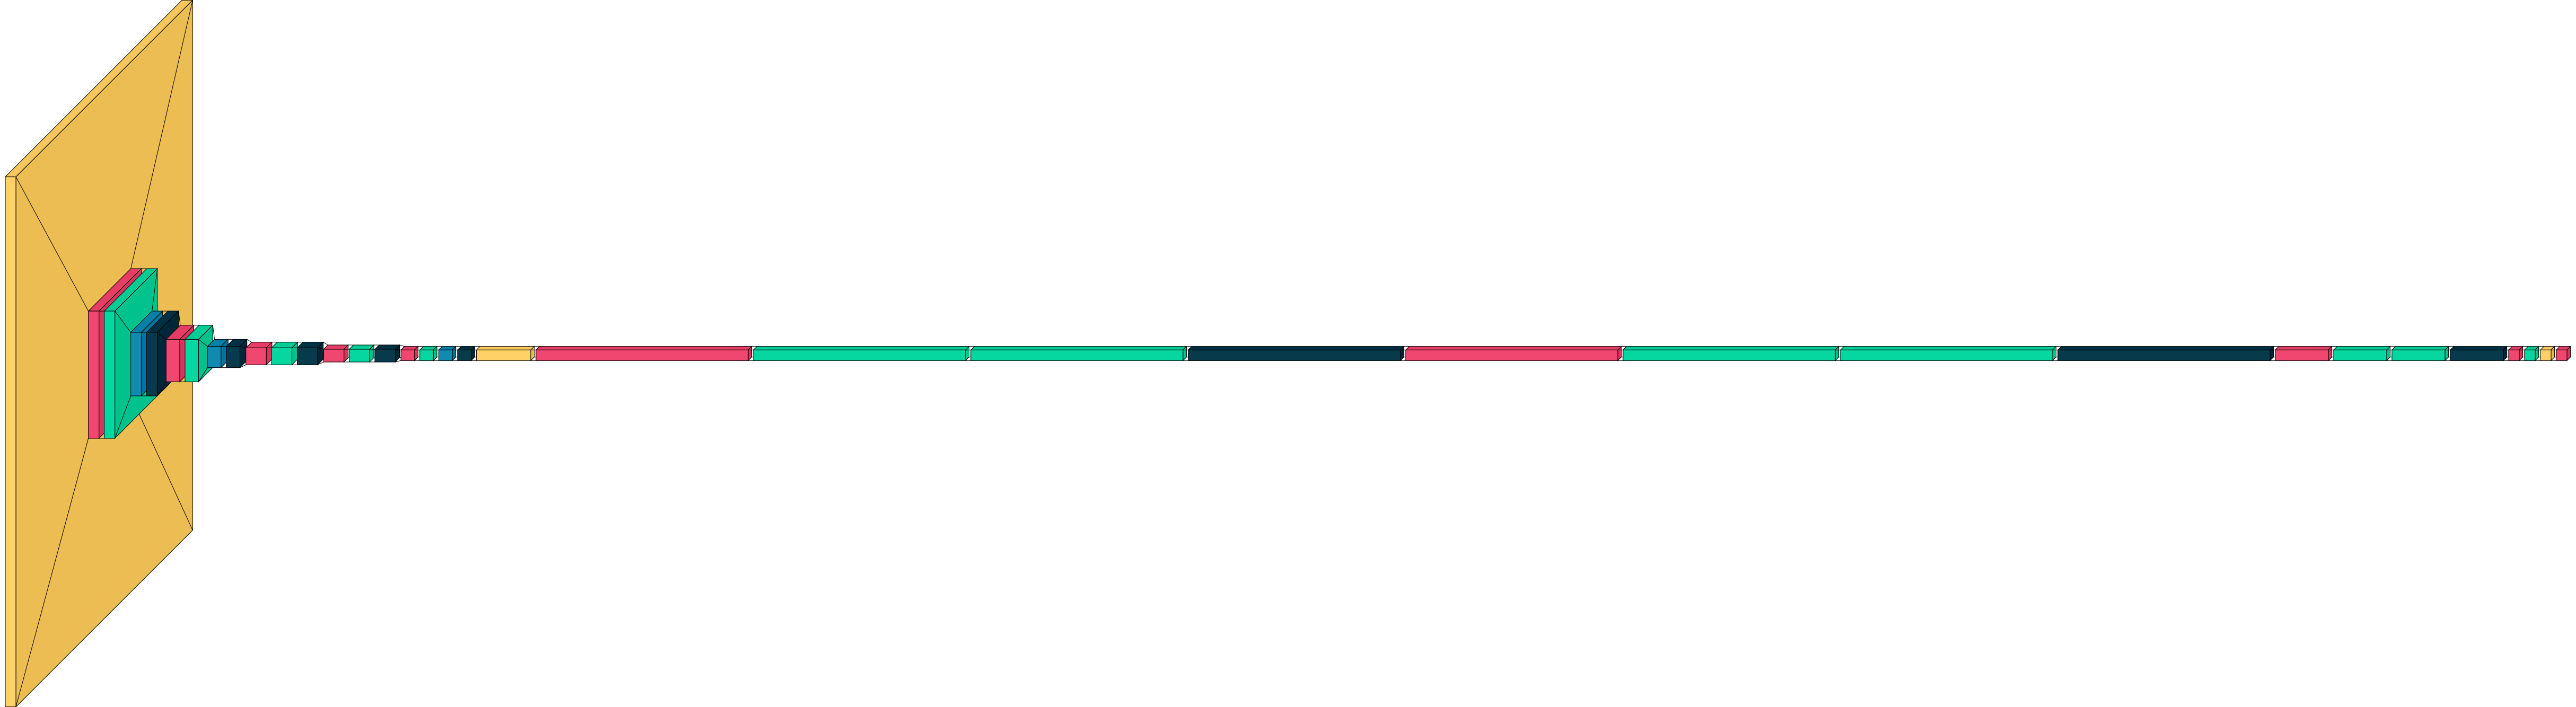

In [37]:
visualkeras.layered_view(model3)

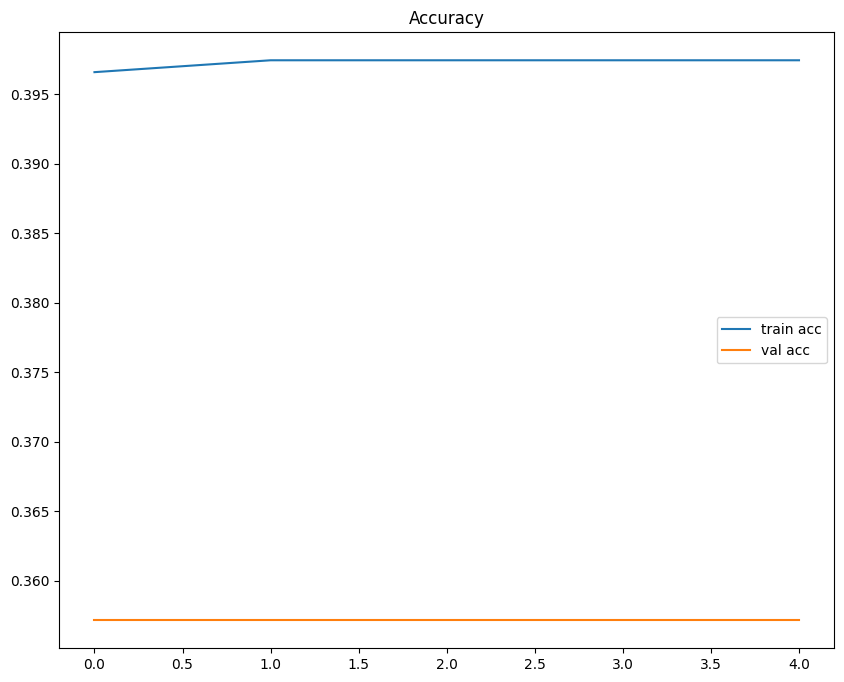

In [38]:
#X
plt.figure(figsize=(10, 8))
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [39]:
from keras.models import load_model

In [40]:
model1 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model1.hdf5')
model2 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model2.hdf5')
model3 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model3.hdf5')

In [41]:
models = [model1, model2, model3]

In [42]:
#models.save(r'D:\university\Thesis\final\Flower kath golap\saved model\models.hdf5')

In [43]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [44]:
print(preds)

[[[0.50738186 0.48798206 0.0046361 ]
  [0.03573762 0.06721419 0.8970482 ]
  [0.57477987 0.29108387 0.13413627]
  ...
  [0.43703395 0.5218302  0.0411359 ]
  [0.36995026 0.5599497  0.07010005]
  [0.1200861  0.24834687 0.631567  ]]

 [[0.23441942 0.7573112  0.00826936]
  [0.01749137 0.01219756 0.97031105]
  [0.5531614  0.16572839 0.28111026]
  ...
  [0.7748242  0.2005929  0.02458289]
  [0.47859597 0.13273592 0.38866812]
  [0.22072677 0.04306949 0.73620373]]

 [[0.38260734 0.26856124 0.34883142]
  [0.38258144 0.2686536  0.34876496]
  [0.38261622 0.26858416 0.34879968]
  ...
  [0.3825313  0.26857358 0.3488952 ]
  [0.38251927 0.26854175 0.348939  ]
  [0.3824406  0.26861918 0.3489403 ]]]


In [45]:
print(summed)

[[1.1244086  1.5138545  0.36173686]
 [0.43581045 0.34806535 2.216124  ]
 [1.5105574  0.7253964  0.7640462 ]
 [1.9484798  0.598603   0.45291725]
 [0.63545394 0.9815469  1.3829992 ]
 [1.9312032  0.59242    0.4763766 ]
 [1.7475829  0.34424227 0.90817475]
 [2.2821085  0.3179415  0.39995003]
 [1.3233639  0.507059   1.169577  ]
 [1.5108973  0.7226956  0.76640713]
 [2.195856   0.41577604 0.38836777]
 [1.8714825  0.6712427  0.4572748 ]
 [1.5105574  0.7253964  0.7640462 ]
 [0.65997696 0.3310179  2.009005  ]
 [0.9898537  1.5057521  0.50439435]
 [0.4569574  0.40243742 2.1406052 ]
 [2.3379374  0.30391037 0.35815242]
 [1.6924382  0.6685245  0.6390374 ]
 [0.72954965 1.3739247  0.89652574]
 [1.9428523  0.46397567 0.59317195]
 [1.9428523  0.46397567 0.59317195]
 [0.7672906  0.5205828  1.7121266 ]
 [0.6531911  1.9736112  0.37319773]
 [0.65791535 0.44592676 1.8961577 ]
 [0.8490875  0.37801707 1.7728955 ]
 [1.5082431  0.65279794 0.83895886]
 [0.5633322  0.91678286 1.5198851 ]
 [0.8351346  1.5252775  0.63

In [46]:
ensemble_prediction = np.argmax(summed, axis=1) #new thought

In [47]:
ensemble_prediction = np.argmax(summed, axis=1)

In [48]:
ensemble_prediction_maximum_values = summed[np.arange(summed.shape[0]),ensemble_prediction] #new thought

In [49]:
print("ensemble_prediction: \n",ensemble_prediction)
print("ensemble_prediction_maximum_values: \n",ensemble_prediction_maximum_values)
print("np.amax(summed, axis=-1): \n",np.amax(summed, axis=-1))

#new thought

ensemble_prediction: 
 [1 2 0 0 2 0 0 0 0 0 0 0 0 2 1 2 0 0 1 0 0 2 1 2 2 0 2 1 0 1 1 0 0 0 0 0 1
 1 0 2 1 1 2 2 0 0 2 2 0 0 0 2 2 0 2 0 0 2 0 1 0 0 0 2 1 0 1 2 0 2 2 0 1 2
 1 2 0 0 0 1 0 1 2 2 1 1 0 2 0 0 0 0 2 0 2 2 2 0 2 2 0 1 0 2 2 1 0 2 0 0 1
 0 0 1 1 2 1 2 1 2 2 2 2 0 1 2 2 0 1 0 1 1 1 0 0 2 1 1 2 0 2 2 0 2 2 1 0 0
 0 1 2 1 0 0 1 1 0 0 2 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 2 2 2 1 1 2 2 0 0 0
 2 1 2 2 2 2 2 2 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2
 2 0 1 0 0 2 0 0 0 0 2 2 1 2 0 2 2 2 0 0 0 0 2 0 2 2 2 1 0 2 2 0 2 2 0 2 1
 1 0 2 2 0 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 1 2 2 2 2 2 2 0 2 0
 0 0 0 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 0 2 0 1 0 0 2 0 0 0 2]
ensemble_prediction_maximum_values: 
 [1.5138545 2.216124  1.5105574 1.9484798 1.3829992 1.9312032 1.7475829
 2.2821085 1.3233639 1.5108973 2.195856  1.8714825 1.5105574 2.009005
 1.5057521 2.1406052 2.3379374 1.6924382 1.3739247 1.9428523 1.9428523
 1.7121266 1.9736112 1.8961577 1.7728955 1.5082431 1.5198851 1.5252

In [50]:
print(ensemble_prediction)

[1 2 0 0 2 0 0 0 0 0 0 0 0 2 1 2 0 0 1 0 0 2 1 2 2 0 2 1 0 1 1 0 0 0 0 0 1
 1 0 2 1 1 2 2 0 0 2 2 0 0 0 2 2 0 2 0 0 2 0 1 0 0 0 2 1 0 1 2 0 2 2 0 1 2
 1 2 0 0 0 1 0 1 2 2 1 1 0 2 0 0 0 0 2 0 2 2 2 0 2 2 0 1 0 2 2 1 0 2 0 0 1
 0 0 1 1 2 1 2 1 2 2 2 2 0 1 2 2 0 1 0 1 1 1 0 0 2 1 1 2 0 2 2 0 2 2 1 0 0
 0 1 2 1 0 0 1 1 0 0 2 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 2 2 2 1 1 2 2 0 0 0
 2 1 2 2 2 2 2 2 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2
 2 0 1 0 0 2 0 0 0 0 2 2 1 2 0 2 2 2 0 0 0 0 2 0 2 2 2 1 0 2 2 0 2 2 0 2 1
 1 0 2 2 0 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 1 2 2 2 2 2 2 0 2 0
 0 0 0 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 0 2 0 1 0 0 2 0 0 0 2]


In [51]:
print("ensemble_prediction_maximum_values: \n",ensemble_prediction_maximum_values)

ensemble_prediction_maximum_values: 
 [1.5138545 2.216124  1.5105574 1.9484798 1.3829992 1.9312032 1.7475829
 2.2821085 1.3233639 1.5108973 2.195856  1.8714825 1.5105574 2.009005
 1.5057521 2.1406052 2.3379374 1.6924382 1.3739247 1.9428523 1.9428523
 1.7121266 1.9736112 1.8961577 1.7728955 1.5082431 1.5198851 1.5252775
 1.5982    2.1693182 1.307064  2.1555333 1.5794694 1.9378347 1.8086834
 1.9201522 1.5480843 1.072612  1.8338114 2.3384337 1.8612955 1.6905899
 1.8632705 1.8650645 1.5614154 1.8550978 1.8436472 1.2625352 2.0612483
 1.8758793 1.798037  1.6757292 2.2746973 2.1188073 1.7293683 1.5338455
 2.012196  1.2988557 1.6464496 1.3245218 2.1389177 1.5659289 2.1116939
 1.5140098 1.1413035 1.3780932 2.040123  1.9154103 1.9130843 2.216124
 2.0872664 1.5598121 1.385021  1.8291279 1.2131107 1.6920917 1.2498984
 1.9328979 1.4092621 1.4039125 1.6985884 2.1194031 1.5559001 1.5900571
 1.5099039 2.1074383 1.8763893 1.5584643 1.5809871 2.143539  1.5931097
 1.7238739 1.2903236 1.458466  1.0945253 

In [52]:
prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)

In [53]:
print('prediction1= ', prediction1)

prediction1=  [[0.50738376 0.48798016 0.00463612]
 [0.0357375  0.06721406 0.8970485 ]
 [0.5747781  0.29108632 0.13413557]
 [0.61992264 0.29201546 0.0880619 ]
 [0.07539799 0.47365853 0.4509434 ]
 [0.6441552  0.26453823 0.09130655]
 [0.4308353  0.05763856 0.5115261 ]
 [0.93374324 0.03499578 0.03126099]
 [0.3661795  0.10308993 0.5307306 ]
 [0.32581803 0.32077202 0.35340992]
 [0.87918997 0.08767872 0.03313133]
 [0.57742995 0.3627204  0.05984967]
 [0.5747781  0.29108632 0.13413557]
 [0.13145545 0.02083557 0.847709  ]
 [0.13019462 0.76918846 0.10061689]
 [0.01537078 0.05245119 0.9321781 ]
 [0.98260164 0.01175351 0.00564491]
 [0.5584558  0.22795297 0.2135912 ]
 [0.10711067 0.55159193 0.34129733]
 [0.6887253  0.17166749 0.13960722]
 [0.6887253  0.17166749 0.13960722]
 [0.19951296 0.22128168 0.57920533]
 [0.11095441 0.8699005  0.01914505]
 [0.14615254 0.04407562 0.80977184]
 [0.33802116 0.0182395  0.6437394 ]
 [0.607213   0.22647372 0.16631323]
 [0.06756954 0.44670105 0.4857294 ]
 [0.17229322 0

In [54]:
prediction1_1 = np.argmax(prediction1,axis=1)

In [55]:
prediction2_1 = np.argmax(prediction2,axis=1)

In [56]:
prediction3_1 = np.argmax(prediction3,axis=1)

In [57]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [58]:
#print('= ', x_test)

In [59]:
#print('= ', y_test)

In [60]:
accuracy1 = accuracy_score(y_test, prediction1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [61]:
accuracy2 = accuracy_score(y_test, prediction2)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [62]:
accuracy3 = accuracy_score(y_test, prediction3)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [63]:
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

In [64]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

NameError: name 'accuracy1' is not defined

In [ ]:
"""import cv2
image=cv2.imread(str)"""

In [65]:
import random

In [66]:
print(ensemble_prediction)

[1 2 0 0 2 0 0 0 0 0 0 0 0 2 1 2 0 0 1 0 0 2 1 2 2 0 2 1 0 1 1 0 0 0 0 0 1
 1 0 2 1 1 2 2 0 0 2 2 0 0 0 2 2 0 2 0 0 2 0 1 0 0 0 2 1 0 1 2 0 2 2 0 1 2
 1 2 0 0 0 1 0 1 2 2 1 1 0 2 0 0 0 0 2 0 2 2 2 0 2 2 0 1 0 2 2 1 0 2 0 0 1
 0 0 1 1 2 1 2 1 2 2 2 2 0 1 2 2 0 1 0 1 1 1 0 0 2 1 1 2 0 2 2 0 2 2 1 0 0
 0 1 2 1 0 0 1 1 0 0 2 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 2 2 2 1 1 2 2 0 0 0
 2 1 2 2 2 2 2 2 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2
 2 0 1 0 0 2 0 0 0 0 2 2 1 2 0 2 2 2 0 0 0 0 2 0 2 2 2 1 0 2 2 0 2 2 0 2 1
 1 0 2 2 0 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 1 2 2 2 2 2 2 0 2 0
 0 0 0 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 0 2 0 1 0 0 2 0 0 0 2]


In [67]:
print(x_test)

[[[[0.2627451  0.24313725 0.03529412]
   [0.2627451  0.24313725 0.03529412]
   [0.2627451  0.24313725 0.03529412]
   ...
   [0.01960784 0.28235294 0.12941176]
   [0.01960784 0.28235294 0.12941176]
   [0.01960784 0.28235294 0.12941176]]

  [[0.26666667 0.22745098 0.03529412]
   [0.26666667 0.22745098 0.03529412]
   [0.26666667 0.22745098 0.03529412]
   ...
   [0.01960784 0.28235294 0.12941176]
   [0.01960784 0.28235294 0.12941176]
   [0.01960784 0.28235294 0.12941176]]

  [[0.23921569 0.21568627 0.02745098]
   [0.24313725 0.20784314 0.01960784]
   [0.24313725 0.21960784 0.03137255]
   ...
   [0.01960784 0.28235294 0.12941176]
   [0.01960784 0.28235294 0.12941176]
   [0.01960784 0.28235294 0.12941176]]

  ...

  [[0.10980392 0.09019608 0.00784314]
   [0.12156863 0.10196078 0.01960784]
   [0.11764706 0.09803922 0.01568627]
   ...
   [0.         0.00392157 0.00392157]
   [0.         0.00392157 0.00784314]
   [0.00392157 0.00392157 0.00392157]]

  [[0.09019608 0.08627451 0.00784314]
   [0.0

In [68]:
x=np.argmax(x_test)

In [69]:
print(x)

110648


In [70]:
print(ensemble_prediction)

[1 2 0 0 2 0 0 0 0 0 0 0 0 2 1 2 0 0 1 0 0 2 1 2 2 0 2 1 0 1 1 0 0 0 0 0 1
 1 0 2 1 1 2 2 0 0 2 2 0 0 0 2 2 0 2 0 0 2 0 1 0 0 0 2 1 0 1 2 0 2 2 0 1 2
 1 2 0 0 0 1 0 1 2 2 1 1 0 2 0 0 0 0 2 0 2 2 2 0 2 2 0 1 0 2 2 1 0 2 0 0 1
 0 0 1 1 2 1 2 1 2 2 2 2 0 1 2 2 0 1 0 1 1 1 0 0 2 1 1 2 0 2 2 0 2 2 1 0 0
 0 1 2 1 0 0 1 1 0 0 2 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 2 2 2 1 1 2 2 0 0 0
 2 1 2 2 2 2 2 2 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2
 2 0 1 0 0 2 0 0 0 0 2 2 1 2 0 2 2 2 0 0 0 0 2 0 2 2 2 1 0 2 2 0 2 2 0 2 1
 1 0 2 2 0 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 1 2 2 2 2 2 2 0 2 0
 0 0 0 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 0 2 0 1 0 0 2 0 0 0 2]


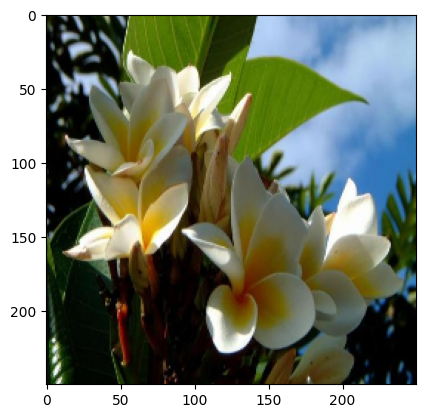

In [71]:
img_sample=random.randint(1,len(y_test))
plt.imshow(cv2.cvtColor(x_test[img_sample, :].astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()

In [72]:
#i = random.randint(1,len(prediction1))
#plt.imshow(cv2.cvtColor(x_test[i,:,:,0].astype('float32'), cv2.COLOR_BGR2RGB))
#plt.imshow(x_test[i,:,:,0]) 
#print("Predicted Label: ", class_names[int(prediction[i])])
#print("True Label: ", class_names[int(y_test[i])])

In [ ]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [135]:
classes=['Bloom','Pre Bloom', 'Post Bloom']

In [141]:
#4
from keras.preprocessing import image
import numpy as np
import keras

img_pred=tf.keras.utils.load_img(r"D:\university\Thesis\final\Flower kath golap\New folder (2)\2testing\Pre Bloom\1.jpg",target_size=(250,250))
img_pred=tf.keras.preprocessing.image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
img_pred=img_pred/255

preds = [model.predict(img_pred) for model in models]

print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

m2 = np.amax(preds[1][0])
p2 = list(preds[1][0]).index(m2)

m3 = np.amax(preds[2][0])
p3 = list(preds[2][0]).index(m3)

find = {m1:p1, m2:p2, m3:p3}

max = np.amax([m1,m2,m3])


classes[find[max]]


[array([[0.05829416, 0.13317315, 0.8085327 ]], dtype=float32), array([[0.03224165, 0.08350637, 0.88425195]], dtype=float32), array([[0.38265938, 0.2685743 , 0.34876636]], dtype=float32)]


'Post Bloom'

In [144]:
print("preds[0][0]: ",preds[0][0])
m1 = np.amax(preds[0][0])
print("m1: ",m1)
p1 = list(preds[0][0]).index(m1)
print("p1: ",p1)

print("preds[1][0]: ",preds[1][0])
m2 = np.amax(preds[1][0])
print("m2: ",m2)
p2 = list(preds[1][0]).index(m2)
print("p2: ",p2)

print("preds[2][0]: ",preds[2][0])
m3 = np.amax(preds[2][0])
print("m3: ",m3)
p3 = list(preds[2][0]).index(m3)
print("p3: ",p3)

find = {m1:p1, m2:p2, m3:p3}
print("find: ",find)

max = np.amax([m1,m2,m3])
print("max: ",max)

classes[find[max]]
print(find[max])

preds[0][0]:  [0.05829416 0.13317315 0.8085327 ]
m1:  0.8085327
p1:  2
preds[1][0]:  [0.03224165 0.08350637 0.88425195]
m2:  0.88425195
p2:  2
preds[2][0]:  [0.38265938 0.2685743  0.34876636]
m3:  0.38265938
p3:  0
find:  {0.8085327: 2, 0.88425195: 2, 0.38265938: 0}
max:  0.88425195
2


In [77]:
preds[0],preds[1],preds[2]

(array([[0.7425414 , 0.07332946, 0.18412915]], dtype=float32),
 array([[0.74166787, 0.04608883, 0.21224324]], dtype=float32),
 array([[0.38267353, 0.2685366 , 0.34878987]], dtype=float32))

In [85]:
print(preds[0][0])

[0.7425414  0.07332946 0.18412915]


In [90]:
np.amax(preds[0])

0.7425414

In [91]:
np.amax(preds)

0.7425414

In [81]:
np.argmax(preds[1])

0

In [82]:
np.argmax(preds[2])

0

In [114]:
m = np.amax(preds[0][0])
list(preds[0][0]).index(m)

0

In [117]:
m1 = np.amax(preds[1][0])
list(preds[1][0]).index(m1)

0

In [118]:
m2 = np.amax(preds[2][0])
list(preds[2][0]).index(m2)

0

In [110]:
list(preds[2][0])

[0.38267353, 0.2685366, 0.34878987]

In [106]:
list(preds[0][0]).index(np.amax(preds[0][0]))

0

In [120]:
list(preds[0][0]).index(np.amax(preds[0][0]))
list(preds[1][0]).index(np.amax(preds[1][0]))
list(preds[2][0]).index(np.amax(preds[2][0]))

0

In [128]:
m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m)

m2 = np.amax(preds[1][0])
p2 = list(preds[1][0]).index(m2)

m3 = np.amax(preds[2][0])
p3 = list(preds[2][0]).index(m3)

find = {m1:p1, m2:p2, m3:p3}

max = np.amax([m1,m2,m3])

In [130]:
find[max]

0

In [129]:
print(max)

0.7425414


In [127]:
m1,m2,m3

(0.7425414, 0.74166787, 0.38267353)

In [132]:
classes=['Bloom','Pre Bloom', 'Post Bloom']

In [133]:
classes[find[max]]

'Bloom'